# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 0. Clean Up the Zombie Processes
At the end of this notebook, when you execute `env.close()`, it does not clean up the environment completely. Instead, the Unity environment process becomes a "zombie" process. A zombie process is one that has completed execution but still has an entry in the process table because its parent process hasn’t properly reaped it.
You can yourself verify this by running these commands in the terminal. Find the parent process ID (PPID) of the zombie process:
```bash
ps -o pid,ppid,stat,cmd | grep Reacher
```
If the parent process (PPID) is not 1, kill it to clean up the zombie process:
```bash
kill -9 <PPID>
```
Below is the equivalent Python code that checks for and cleans zombie processes using `psutil`. **You need run the cell below only when you restart the Unity environment.** 

> **NOTE**: The code cell below will also kill the Kernel. You should restart it when required.

In [6]:
import psutil

def cleanup_zombie_processes():
    for proc in psutil.process_iter(['pid', 'ppid', 'name', 'status']):
        if proc.info['name'] == 'Reacher_One_Lin' and proc.info['status'] == 'zombie':
            print(f"Zombie process detected: {proc.info}")
            parent = psutil.Process(proc.info['ppid'])
            print(f"Terminating parent process: {parent}")
            parent.terminate()

cleanup_zombie_processes()

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [3]:
!pip -q install .

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/78/a9/97cbbc97002fff0de394a2da2cdfa859481fdca36996d7bd845d50aa9d8d/torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/89/ec/00d68c4ddfedfe64159999e5f8a98fb8442729a63e2077eb9dcd89623d27/filelock-3.17.0-py3-none-any.whl.metadata
  Obtaining dependency information for typing-extensions>=4.10.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/b9/54/dd730b32ea14ea797530a4479b2ed46a6fb250f682a9cfb997e968bf0261/networkx-3.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for nvidia-cuda-nvrtc-cu12==12.4.127 from ht

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 25.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 9.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 3.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [1]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

Found path: /data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64
Mono path[0] = '/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis_Data/Managed'
Mono config path = '/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/student/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.1099999975413084


When finished, you can close the environment.

In [7]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

Import necessary packages

In [4]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [5]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)

The training codes in the following cell uses an DDPG agent with:
- **Actor**: fully connected layers with 2 hidden layers: **state -> fc1 (256) -> bn1 -> relu -> fc2 (256) -> bn2 -> relu -> action -> tanh**
- **Critic**: fully connected layers with 2 hidden layers: **state + action -> fc1 (256) -> bn1 -> relu -> fc2 (256) -> bn2 -> relu -> q-value**

The training looks converging, however, the training takes very long time, the average score only reaches about 15 after 1600 episode of training.

Therefore, I changed the NN structure to a simpler one as in the cell after.

In [ ]:
def ddpg(n_episodes=50000, max_t=1000, eps=1, eps_decay=0.9992):
    scores_deque = deque(maxlen=100)
    scores = []   
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        state = env_info.vector_observations[0]                  # get the current state (for each agent)
        agent.reset()
        score = 0
        eps *= eps_decay
        for t in range(max_t):
            action = agent.act(state, eps=eps)  
            env_info = env.step(action)[brain_name]           # send all actions to tne environment
            next_state = env_info.vector_observations[0]         # get next state (for each agent)
            reward = env_info.rewards[0]                         # get reward (for each agent)
            done = env_info.local_done[0]                        # see if episode finished
            agent.step(state, action, reward, next_state, done)
            score += reward                                    # update the score (for each agent)
            state = next_state                                 # roll over states to next time step
            if done:                                           # exit loop if episode finished
                break
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end='')
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score)) 
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode > 100 and np.mean(scores_deque) > 30:
            print('\r\nEnvironment solved at episode {}\t with average Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'model_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'model_critic.pth')
            break
          
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 2.17	Score: 0.78
Episode 200	Average Score: 3.92	Score: 8.587
Episode 300	Average Score: 5.55	Score: 0.541
Episode 400	Average Score: 6.12	Score: 0.723
Episode 500	Average Score: 8.51	Score: 1.043
Episode 600	Average Score: 7.97	Score: 8.504
Episode 700	Average Score: 8.82	Score: 15.16
Episode 800	Average Score: 7.95	Score: 0.746
Episode 900	Average Score: 10.06	Score: 1.584
Episode 1000	Average Score: 10.53	Score: 18.93
Episode 1100	Average Score: 11.71	Score: 21.79
Episode 1200	Average Score: 12.17	Score: 24.17
Episode 1300	Average Score: 13.08	Score: 37.68
Episode 1400	Average Score: 12.00	Score: 20.84
Episode 1500	Average Score: 15.52	Score: 4.882
Episode 1600	Average Score: 14.21	Score: 14.41
Episode 1603	Average Score: 14.21	Score: 11.49

The DDPG agent in the following cell uses different NN structures:
- **Actor**: fully connected layers: **state -> fc1 (128) -> relu -> bn1 -> fc2 (128) -> relu -> action -> tanh**
- **Critic**: fully connected layers: **state -> fcs1 (128) -> leaky_relu -> bn1 -> fc2 (128 + action (4)) -> leaky_relu -> q-value**

With this NN structure, the agent was able to learn much faster and solved the environment after **544 episodes**, with an average score of **30.03**

Episode 100	Average Score: 2.19	Score: 2.04
Episode 200	Average Score: 9.06	Score: 18.84
Episode 300	Average Score: 15.96	Score: 19.04
Episode 400	Average Score: 19.40	Score: 13.58
Episode 500	Average Score: 27.14	Score: 17.20
Episode 544	Average Score: 30.03	Score: 36.26
Environment solved at episode 544	 with average Score: 30.03


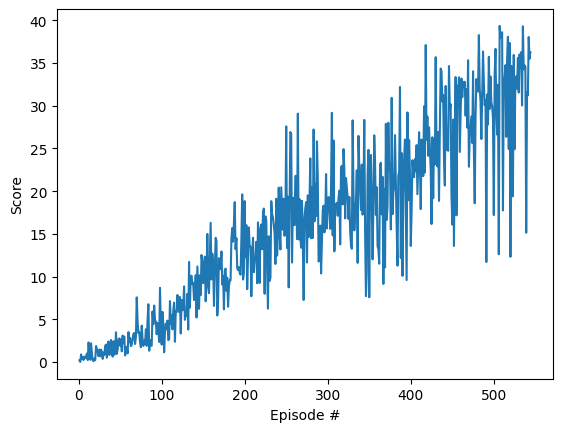

In [6]:
def ddpg(n_episodes=50000, max_t=1000, eps=1, eps_decay=0.9999):
    scores_deque = deque(maxlen=100)
    scores = []   
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        state = env_info.vector_observations[0]                  # get the current state (for each agent)
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state.reshape(1, -1), eps=eps)
            if t % 20 == 0:
                eps *= eps_decay
            env_info = env.step(action)[brain_name]           # send all actions to tne environment
            next_state = env_info.vector_observations[0]         # get next state (for each agent)
            reward = env_info.rewards[0]                         # get reward (for each agent)
            done = env_info.local_done[0]                        # see if episode finished
            agent.step(state, action, reward, next_state, done)
            score += reward                                    # update the score (for each agent)
            state = next_state                                 # roll over states to next time step
            if done:                                           # exit loop if episode finished
                break
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end='')
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score)) 
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode > 100 and np.mean(scores_deque) > 30:
            print('\r\nEnvironment solved at episode {}\t with average Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'model_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'model_critic.pth')
            break
          
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()